In [14]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Import data
df=pd.read_csv("dataset_processing_clean.csv")
df

,Unnamed: 0,Label,tweet,Tokenization,Stop_Removal,Tweet_Stemmed
0,0,Netral,apa dia ngerti,"['apa', 'dia', 'ngerti']",['ngerti'],['ngerti']
1,1,Netral,NaN,[''],[''],['']
2,2,Negatif,suara sumbang ancam konstitusi marwah desa dii...,"['suara', 'sumbang', 'ancam', 'konstitusi', 'm...","['suara', 'sumbang', 'ancam', 'konstitusi', 'm...","['suara', 'sumbang', 'ancam', 'konstitusi', 'm..."
3,3,Negatif,banyak tong bahkan lbh baik siapa buka matamu ...,"['banyak', 'tong', 'bahkan', 'lbh', 'baik', 's...","['tong', 'lbh', 'buka', 'matamu', 'gimmick', '...","['tong', 'lbh', 'buka', 'mata', 'gimmick', 'ak..."
4,4,Negatif,jokowi klaim usulan periode dari masyarakat ma...,"['jokowi', 'klaim', 'usulan', 'periode', 'dari...","['jokowi', 'klaim', 'usulan', 'periode', 'masy...","['jokowi', 'klaim', 'usul', 'periode', 'masyar..."
...,...,...,...,...,...,...
110,110,Negatif,n pantesan getol banget mempertahankan periode...,"['n', 'pantesan', 'getol', 'banget', 'memperta...","['n', 'pantesan', 'getol', 'banget', 'memperta...","['n', 'pantesan', 'getol', 'banget', 'tahan', ..."
111,111,Netral,mau shaum sabtu atau ahad tdk jadi masalah pen...,"['mau', 'shaum', 'sabtu', 'atau', 'ahad', 'tdk...","['shaum', 'sabtu', 'ahad', 'tdk', 'shaum', 'lu...","['shaum', 'sabtu', 'ahad', 'tdk', 'shaum', 'lu..."
112,112,Netral,periode,['periode'],['periode'],['periode']
113,113,Negatif,ngurus hal receh ora gableg ngotot mau berkuas...,"['ngurus', 'hal', 'receh', 'ora', 'gableg', 'n...","['ngurus', 'receh', 'ora', 'gableg', 'ngotot',...","['ngurus', 'receh', 'ora', 'gableg', 'ngotot',..."


<AxesSubplot:>

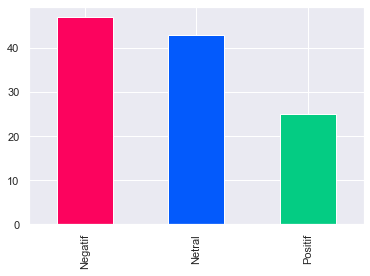

In [40]:
colors=['#fc035e','#035afc','#04cc83']
sns.set(style="darkgrid")
df['Label'].value_counts().plot.bar(color=colors,figsize=(6,4))


In [41]:
df['Label'].value_counts()

Negatif    47
Netral     43
Positif    25
Name: Label, dtype: int64

In [7]:
def convert(polarity):
    if polarity == "Positif":
        return 1
    elif polarity == "Netral":
        return 0
    else:
        return -1

In [8]:
df['polarity'] = df['Label'].apply(convert)
df['polarity']

0      0
1      0
2     -1
3     -1
4     -1
      ..
110   -1
111    0
112    0
113   -1
114    0
Name: polarity, Length: 115, dtype: int64

In [9]:
x = df['Tweet_Stemmed']
y = df['polarity']

In [10]:
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(df['isi'])

bow_transformer = CountVectorizer()
print(df['Tweet_Stemmed'].shape)
X = bow_transformer.fit_transform(df['Tweet_Stemmed'])

print(X.toarray())
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero Occurrences: ', X.nnz)

#TFIDF Transform
tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

(115,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Sparse Matrix:  (115, 432)
Amount of Non-Zero Occurrences:  871
(115, 432)


In [11]:
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Density: 1.753220611916264


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
print(X_test)

  (0, 11)	0.41702882811414954
  (0, 41)	0.20851441405707477
  (0, 103)	0.20851441405707477
  (0, 123)	0.20851441405707477
  (0, 195)	0.20851441405707477
  (0, 201)	0.20851441405707477
  (0, 247)	0.20851441405707477
  (0, 284)	0.20851441405707477
  (0, 304)	0.6255432421712244
  (0, 317)	0.20851441405707477
  (0, 395)	0.20851441405707477
  (0, 405)	0.20851441405707477
  (1, 63)	0.22360679774997896
  (1, 75)	0.4472135954999579
  (1, 90)	0.22360679774997896
  (1, 161)	0.22360679774997896
  (1, 179)	0.22360679774997896
  (1, 185)	0.22360679774997896
  (1, 193)	0.22360679774997896
  (1, 200)	0.22360679774997896
  (1, 205)	0.22360679774997896
  (1, 247)	0.22360679774997896
  (1, 292)	0.22360679774997896
  (1, 304)	0.4472135954999579
  (1, 403)	0.22360679774997896
  :	:
  (15, 288)	0.35355339059327373
  (16, 304)	1.0
  (18, 13)	0.4082482904638631
  (18, 73)	0.4082482904638631
  (18, 148)	0.4082482904638631
  (18, 222)	0.4082482904638631
  (18, 263)	0.4082482904638631
  (18, 304)	0.408248290463

In [25]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)

In [30]:
confusion_matrix(y_test,preds)

array([[10,  1,  0],
       [ 3,  7,  0],
       [ 2,  0,  0]], dtype=int64)

In [28]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.67      0.91      0.77        11
           0       0.88      0.70      0.78        10
           1       0.00      0.00      0.00         2

    accuracy                           0.74        23
   macro avg       0.51      0.54      0.52        23
weighted avg       0.70      0.74      0.71        23



C:\Users\rayha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rayha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rayha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
